In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

 Load the dataset

In [2]:
df = pd.read_csv('../data/data.csv')

1. Create Aggregate Features


We will group transactions by customer and compute aggregate statistics

In [3]:
# Aggregate features
aggregate_df = df.groupby('CustomerId').agg(
    total_transaction_amount=('Amount', 'sum'),
    avg_transaction_amount=('Amount', 'mean'),
    transaction_count=('TransactionId', 'count'),
    std_transaction_amount=('Amount', 'std')
).reset_index()

print(aggregate_df.head())

        CustomerId  total_transaction_amount  avg_transaction_amount  \
0     CustomerId_1                  -10000.0           -10000.000000   
1    CustomerId_10                  -10000.0           -10000.000000   
2  CustomerId_1001                   20000.0             4000.000000   
3  CustomerId_1002                    4225.0              384.090909   
4  CustomerId_1003                   20000.0             3333.333333   

   transaction_count  std_transaction_amount  
0                  1                     NaN  
1                  1                     NaN  
2                  5             6558.963333  
3                 11              560.498966  
4                  6             6030.478146  


2. Extract Time-based Features

We will extract features like the hour, day, month, and year from the TransactionStartTime

In [4]:
# Convert 'TransactionStartTime' to datetime if it's not in that format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract hour, day, month, and year
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day'] = df['TransactionStartTime'].dt.day
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year

print(df[['transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']].head())


   transaction_hour  transaction_day  transaction_month  transaction_year
0                 2               15                 11              2018
1                 2               15                 11              2018
2                 2               15                 11              2018
3                 3               15                 11              2018
4                 3               15                 11              2018


3. Encode Categorical Variables

In [6]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['CurrencyCode', 'ProviderId', 'ProductCategory', 'ChannelId'], drop_first=True)
print(df_encoded.head())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId  CountryCode     ProductId   Amount  Value  \
0  CustomerId_4406          256  ProductId_10   1000.0   1000   
1  CustomerId_4406          256   ProductId_6    -20.0     20   
2  CustomerId_4683          256   ProductId_1    500.0    500   
3   CustomerId_988          256  ProductId_21  20000.0  21800   
4   CustomerId_988          256   ProductId_6   -644.0    644   

       TransactionStartTime  ...  ProductCategory_financial_services  \
0 2018-11-15 02:18:49+00:00  ...                              

Label Encoding (for ordinal categories)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
# le = LabelEncoder()
# df['ChannelId_encoded'] = le.fit_transform(df['ChannelId'])
# print(df[['ChannelId', 'ChannelId_encoded']].head())
# 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProductId'

label_encoder = LabelEncoder()
label_encoded_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProductId']
for col in label_encoded_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df[['ChannelId', 'ChannelId_encoded']].head())
df.head()

     ChannelId  ChannelId_encoded
0  ChannelId_3                  2
1  ChannelId_2                  1
2  ChannelId_3                  2
3  ChannelId_3                  2
4  ChannelId_2                  1


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year,ChannelId_encoded
0,78150,46980,2490,3535,2584,UGX,256,ProviderId_6,1,airtime,...,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018,2
1,75821,31755,3219,2366,2584,UGX,256,ProviderId_4,19,financial_services,...,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018,1
2,39888,60272,2713,996,2806,UGX,256,ProviderId_6,0,airtime,...,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018,2
3,48738,1797,3351,974,3733,UGX,256,ProviderId_1,11,utility_bill,...,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018,2
4,41364,48941,3219,2366,3733,UGX,256,ProviderId_4,19,financial_services,...,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018,1


4. Handle Missing Values

In [15]:
# Impute missing values with the mean for numerical columns only
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)



In [16]:
# Remove rows with missing values
df.dropna(inplace=True)

5. Normalize/Standardize Numerical Features

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Amount_normalized', 'Value_normalized']] = scaler.fit_transform(df[['Amount', 'Value']])


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Amount_standardized', 'Value_standardized']] = scaler.fit_transform(df[['Amount', 'Value']])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year,ChannelId_encoded,Amount_normalized,Value_normalized,Amount_standardized,Value_standardized
0,78150,46980,2490,3535,2584,UGX,256,ProviderId_6,1,airtime,...,0,2,15,11,2018,2,0.092004,0.000101,-0.046371,-0.072291
1,75821,31755,3219,2366,2584,UGX,256,ProviderId_4,19,financial_services,...,0,2,15,11,2018,1,0.091910,0.000002,-0.054643,-0.080251
2,39888,60272,2713,996,2806,UGX,256,ProviderId_6,0,airtime,...,0,2,15,11,2018,2,0.091958,0.000050,-0.050426,-0.076352
3,48738,1797,3351,974,3733,UGX,256,ProviderId_1,11,utility_bill,...,0,3,15,11,2018,2,0.093750,0.002206,0.107717,0.096648
4,41364,48941,3219,2366,3733,UGX,256,ProviderId_4,19,financial_services,...,0,3,15,11,2018,1,0.091853,0.000065,-0.059704,-0.075183


In [30]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime']).dt.tz_localize(None)

In [32]:
# Calculate RFMS scores for each user
rfms_scores = df.groupby('CustomerId').agg(
    Recency=('TransactionStartTime', lambda x: (pd.Timestamp.now() - x.max()).days),
    Frequency=('TransactionId', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

# Display the first few rows of RFMS scores
rfms_scores.head()

,CustomerId,Recency,Frequency,Monetary
0,0,2147,1,-10000.0
1,1,2147,1,-10000.0
2,2,2153,5,20000.0
3,3,2090,11,4225.0
4,4,2076,6,20000.0


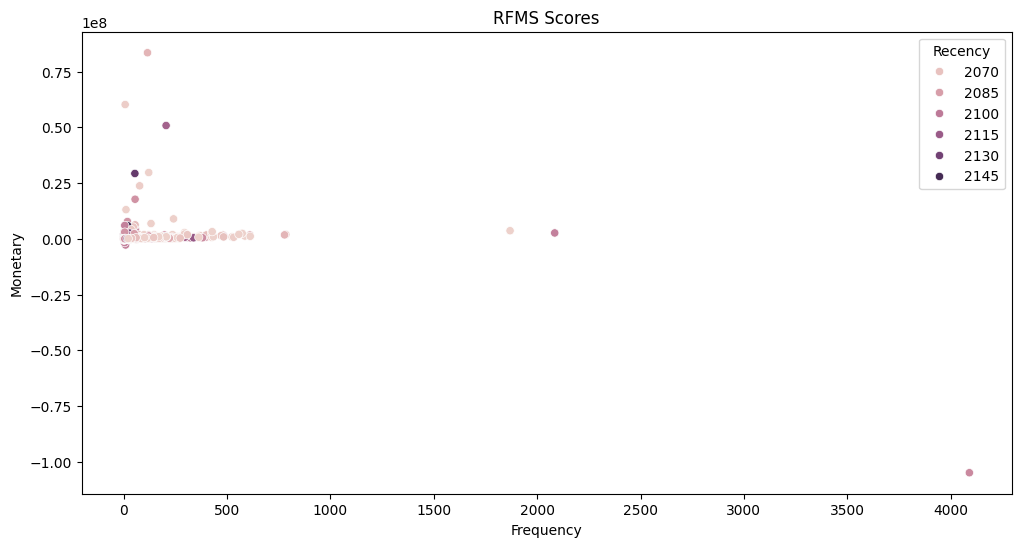

In [37]:
# Visualize RFMS scores
%matplotlib inline

import matplotlib.pyplot as plt

plt.ion()  # Turn on interactive mode

# Your plotting code
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Recency', data=rfms_scores)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFMS Scores')
plt.show()




In [38]:
# 2. Assign Good and Bad Labels
# Define boundary values
high_freq_boundary = rfms_scores['Frequency'].quantile(0.75)
high_monetary_boundary = rfms_scores['Monetary'].quantile(0.75)
low_recency_boundary = rfms_scores['Recency'].quantile(0.25)

# Assign labels based on boundary
rfms_scores['Label'] = 'Good'
rfms_scores.loc[(rfms_scores['Frequency'] <= high_freq_boundary) & 
                (rfms_scores['Monetary'] <= high_monetary_boundary) & 
                (rfms_scores['Recency'] >= low_recency_boundary), 'Label'] = 'Bad'

# Display the first few rows of RFMS scores with labels
rfms_scores

,CustomerId,Recency,Frequency,Monetary,Label
0,0,2147,1,-10000.0,Bad
1,1,2147,1,-10000.0,Bad
2,2,2153,5,20000.0,Bad
3,3,2090,11,4225.0,Bad
4,4,2076,6,20000.0,Bad
...,...,...,...,...,...
3737,3737,2069,6,20000.0,Bad
3738,3738,2090,5,20000.0,Bad
3739,3739,2065,101,543873.0,Good
3740,3740,2132,17,139000.0,Good


Perform WoE Binning

In [ ]:

def calculate_woe_iv(data, feature, target):
    # Initialize list to store WoE and IV values
    lst = []
    
    # Loop through each unique category
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        df = data[data[feature] == val]
        good = len(df[df[target] == 0])
        bad = len(df[df[target] == 1])
        lst.append([val, good, bad])
    
    # Create a DataFrame to hold WoE and IV values
    woe_df = pd.DataFrame(lst, columns=[feature, 'Good', 'Bad'])
    woe_df['Distr_Good'] = woe_df['Good'] / woe_df['Good'].sum()
    woe_df['Distr_Bad'] = woe_df['Bad'] / woe_df['Bad'].sum()
    woe_df['WoE'] = np.log(woe_df['Distr_Good'] / woe_df['Distr_Bad'])
    woe_df['IV'] = (woe_df['Distr_Good'] - woe_df['Distr_Bad']) * woe_df['WoE']
    
    # Calculate total Information Value
    iv = woe_df['IV'].sum()
    
    return woe_df, iv

woe_df, iv = calculate_woe_iv(df, 'ProductCategory', 'FraudResult')
print(woe_df)
print(f'Total IV for ProductCategory: {iv}')

      ProductCategory   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0             airtime  45009   18    0.471451   0.093264  1.620379  0.612807
1  financial_services  45244  161    0.473913   0.834197 -0.565446  0.203721
2        utility_bill   1908   12    0.019986   0.062176 -1.134962  0.047885
3        data_bundles   1613    0    0.016896   0.000000       inf       inf
4                  tv   1279    0    0.013397   0.000000       inf       inf
5           transport     23    2    0.000241   0.010363 -3.761520  0.038073
6              ticket    216    0    0.002263   0.000000       inf       inf
7              movies    175    0    0.001833   0.000000       inf       inf
8               other      2    0    0.000021   0.000000       inf       inf
Total IV for ProductCategory: inf
